M295D1T1
M295D1T2
M295D1T3
M295D1T4
M295D1T5
M295D2T1
M295D2T2
M295D2T3
M295D2T4
M295D2T5
M295D3T1
M295D3T2
M295D3T3
M295D3T4
M295D3T5
M295D4T1
M295D4T2
M295D4T3
M295D4T4
M295D4T5
M295D5T1
M295D5T2
M295D5T3
M295D5T4
M295D5T5
M297D1T1
M297D1T2
M297D1T3
M297D1T4
M297D1T5
M297D2T1
M297D2T2
M297D2T3
M297D2T4
M297D2T5
M297D3T1
M297D3T2
M297D3T3
M297D3T4
M297D3T5
M297D4T1
M297D4T2
M297D4T3
M297D4T4
M297D4T5
M297D5T1
M297D5T2
M297D5T3
M297D5T4
M297D5T5
M298D1T1
M298D1T2
M298D1T3
M298D1T4
M298D1T5
M298D2T1
M298D2T2
M298D2T3
M298D2T4
M298D2T5
M298D3T1
M298D3T2
M298D3T3
M298D3T4
M298D3T5
M298D4T1
M298D4T2
M298D4T3
M298D4T4
M298D4T5
M298D5T1
M298D5T2
M298D5T3
M298D5T4
M298D5T5
M329D1T1
M329D1T2
M329D1T3
M329D1T4
M329D1T5
M329D2T1
M329D2T2
M329D2T3
M329D2T4
M329D2T5
M329D3T1
M329D3T2
M329D3T3
M329D3T4
M329D3T5
M329D4T1
M329D4T2
M329D4T3
M329D4T4
M329D4T5
M329D5T1
M329D5T2
M329D5T3
M329D5T4
M329D5T5
M330D1T1
M330D1T2
M330D1T3
M330D1T4
M330D1T5
M330D2T1
M330D2T2
M330D2T3
M330D2T4
M330D2T5
M330D3T1
M

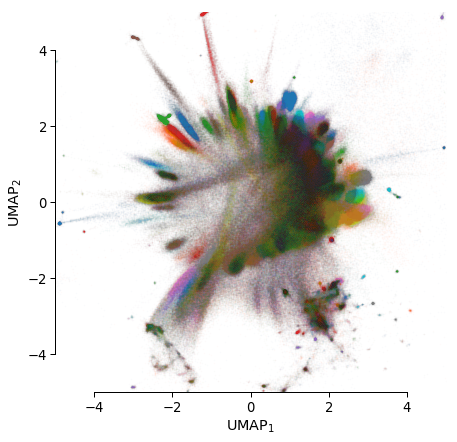

In [45]:
"""Explore the fastKDE PDF."""
import sys
import config_dodo
import config
from utilities import read_pickle, write_pickle
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter, find_peaks

frame_rate = 100.0
latencies = {}
num_frames = {}
lat_fra_ratios = {}
start = 100
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(7, 7))
# for key in config_dodo.KEY_LIST[start + 20:start + 25]:
for key in config_dodo.KEY_LIST:
    name = config_dodo.SUBJECT_NAME.format(*key)
    print(name)
    pickle_end = name + ".pickle"
    # path_out_wav = config_dodo.OUT_PATH / f"out_wav_{pickle_end}"
    path_out_wav = config_dodo.OUT_PATH / f"out_ang_{pickle_end}"
    out_wavs = read_pickle(path_out_wav)
    # plt.scatter(*out_wavs.T, s=1, alpha=0.1)
    plt.scatter(*out_wavs.T, s=1, alpha=0.01)
    plt.xlabel(r"UMAP$_1$")
    plt.ylabel(r"UMAP$_2$")
    # plt.xlim(-15, 25)
    # plt.ylim(-15, 25)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    # plt.xlim(-10, 10)
    # plt.ylim(-10, 10)
    # plt.xlim(-20, 30)
    # plt.ylim(-20, 30)
    # plt.title(name)
sns.despine(trim=True)
plt.show()

In [7]:
import config_dodo
import config
from utilities import read_pickle, write_pickle
wavs = read_pickle(config_dodo.WAV_PATH / "wav_sample.pickle")
out_wavs = read_pickle(config_dodo.OUT_PATH / "out_wav_sample.pickle")

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(
    n_neighbors=30,
    weights="distance",
    algorithm="ball_tree",
    leaf_size=100,
    n_jobs=-1
)

In [13]:
knn.fit(wavs, out_wavs)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=100, n_jobs=-1,
                    weights='distance')

In [4]:
# knn = KNeighborsRegressor(
#     n_neighbors=config.EMB_WAV_N_NEIGHBORS,
#     weights="distance",
#     algorithm="ball_tree",
# )
# knn.fit(wavs, out_wavs)

In [5]:
pca = read_pickle(config_dodo.WAV_PATH / "pca_fit_wav.pickle")

M295D5T1


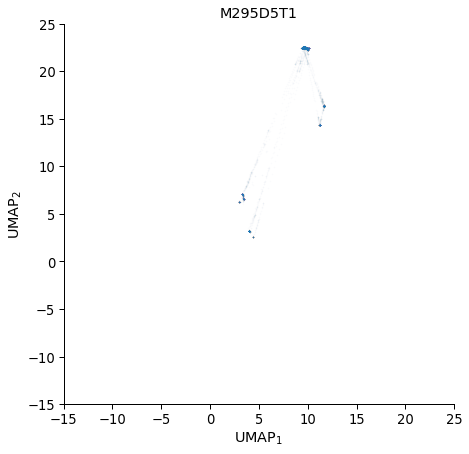

M295D5T2


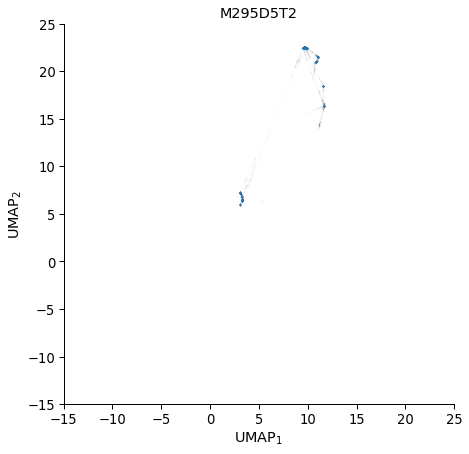

M295D5T3


KeyboardInterrupt: 

<Figure size 504x504 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
start = 0
for key in config_dodo.KEY_LIST[start + 20:start + 25]:
# for key in config_dodo.KEY_LIST:
    sns.set_context("paper", font_scale=1.5)
    plt.figure(figsize=(7, 7))
    name = config_dodo.SUBJECT_NAME.format(*key)
    print(name)
    pickle_end = name + ".pickle"
    trial_wavs = pca.transform(
        read_pickle(config_dodo.WAV_PATH / f"wav_{pickle_end}")
    )[:, : config.EMB_WAV_PCA_NUM_COMPONENTS]
    trial_out_wavs = knn.predict(trial_wavs)
    # plt.scatter(*trial_out_wavs.T, s=1, alpha=0.1)
    plt.scatter(*trial_out_wavs.T, s=1, alpha=0.01)
    plt.xlabel(r"UMAP$_1$")
    plt.ylabel(r"UMAP$_2$")
    plt.xlim(-15, 25)
    plt.ylim(-15, 25)
    # plt.xlim(-5, 5)
    # plt.ylim(-5, 5)
    # plt.xlim(-10, 10)
    # plt.ylim(-10, 10)
    # plt.xlim(-20, 30)
    # plt.ylim(-20, 30)
    plt.title(name)
    sns.despine(trim=True)
    plt.show()